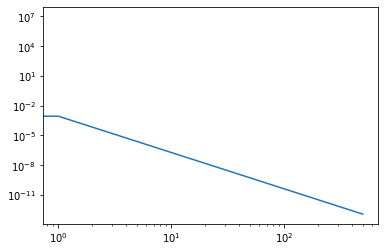

In [13]:
# start from an expected power spectral density, and generate physically-expected turbulence data.
# has nothing to do with HCIPy's atmosphere sim.

import numpy as np
from matplotlib import pyplot as plt
from scipy import signal, stats, optimize
%matplotlib inline

f_sampling = 1000 # Hz
time_id = 1
N = f_sampling * time_id
a = 1e-6
fc = 0.01

# make the desired PSD
i = 1j
df = 1/time_id
f = (np.arange(N)-N//2)*df
s = i*f
xF = 1./((s+a)**(1/3)*(s+fc)**(3/2)) # this is the FT desired
psd = (xF**2)[N//2:].real/1000
plt.loglog(f[N//2:], psd)

In [14]:
# linear fit to this should give me -11/3
k = 1
log_freqs, log_power = np.log(f[N//2+k:]), np.log((xF**2)[N//2+k:])
m, b = stats.linregress(log_freqs, log_power)[:2]
abs(m + 11/3) # should be close to 0
# yay
# also, boost k to get progressively better fits!

0.0010260197794580263

In [15]:
# now let's invert this to make representative turbulence data!

# first, we square-root the psd information
real_ft = np.sqrt(psd)
phases = np.random.uniform(0, 2 * np.pi, size=(N//2,))
ft = real_ft * np.exp(1j * phases)
print(np.argwhere(np.abs(psd - np.abs(ft**2)) > 1e-6).T)

[]


In [16]:
full_ft = np.hstack((xF[0], np.flip(ft), ft[1:]))

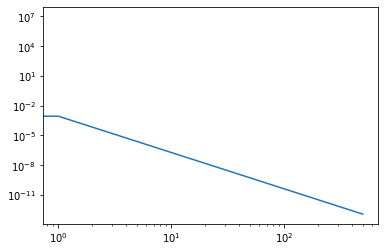

In [17]:
plt.loglog(f, np.abs(full_ft)**2) # verify that full_ft has the right PSD

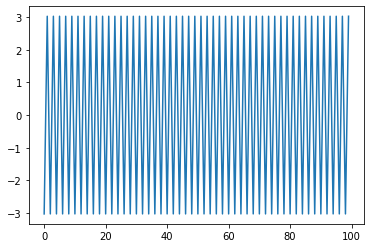

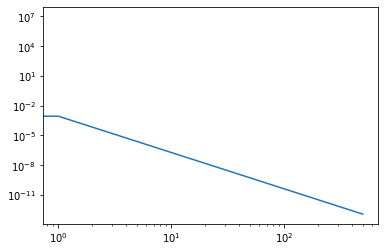

In [18]:
xr = np.fft.ifft(full_ft)
plt.plot(xr[:100])
plt.show()
plt.loglog(f, np.abs(np.fft.fft(xr))**2)
plt.show()